In [ ]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file
gdf = gpd.read_file(r"D:\DEPI AI_Data science\final project\visualization\sample.geojson")
# Helper function to check if a value means True (e.g., "T", "TRUE", "1")
def is_true(val):
    if pd.isna(val):
        return False
    s = str(val).strip().upper()
    return s in ["T", "TRUE", "1", "Y", "YES"]

# Map each row to a road type: Bridge, Tunnel, or Normal Road
def map_road(row):
    if is_true(row.get("bridge", False)):
        return "Bridge"
    if is_true(row.get("tunnel", False)):
        return "Tunnel"
    return "Normal Road"

# Create a new column for road type
gdf["road_type"] = gdf.apply(map_road, axis=1)

# Fill missing defect labels with "none"
gdf["label"] = gdf["label"].fillna("none")


In [16]:
gdf.head(5)

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,...,confidence,image,lon,lat,x1,y1,x2,y2,geometry,road_type
0,9929693,5114,secondary,شارع دكتور على مصطفى مشرفه,None,F,0,0,F,F,...,0.95,image_29ead06c.jpg,-1.909644,72.458964,0.1672,0.2710,0.3152,0.5201,"LINESTRING (29.90688 31.20802, 29.90695 31.207...",Normal Road
1,24228847,5115,tertiary,شارع الشهيد محمد السيد حنفى,None,F,0,0,F,F,...,0.93,image_b981f4e7.jpg,-149.663118,-66.493054,0.4991,0.3157,0.9736,0.4988,"LINESTRING (29.93321 31.21829, 29.93328 31.218...",Normal Road
2,24450793,5114,secondary,ميدان عزبة سعد,None,F,0,0,F,F,...,0.66,image_c9184839.jpg,156.020746,-85.787536,0.2570,0.8961,0.3423,0.9173,"LINESTRING (29.94094 31.2081, 29.94087 31.2081...",Normal Road
3,24662354,5122,residential,شارع ابن شجاع,None,B,0,0,F,F,...,0.80,image_e14e2d5f.jpg,-3.580571,78.854298,0.3008,0.9293,0.5397,1.0000,"LINESTRING (29.90693 31.20658, 29.90785 31.205...",Normal Road
4,25185997,5112,trunk,طريق قناه السويس,None,F,0,0,F,F,...,0.63,image_855c51f8.jpg,40.148048,-84.661764,0.3732,0.6835,0.6360,0.8869,"LINESTRING (29.91184 31.21014, 29.91195 31.210...",Normal Road


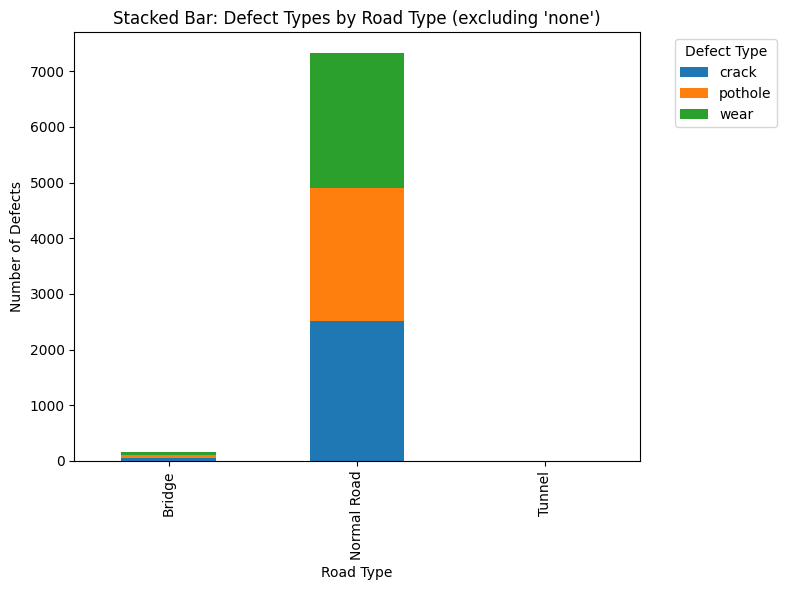

In [ ]:
import matplotlib.pyplot as plt

# Filter out rows with label = "none"
df_defects = gdf[gdf["label"].str.lower() != "none"].copy()

#  Count number of each defect type per road type
counts = df_defects.groupby(["road_type", "label"]).size().unstack(fill_value=0)

# Plot stacked bar chart
counts.plot(kind="bar", stacked=True, figsize=(8,6))
plt.xlabel("Road Type")
plt.ylabel("Number of Defects")
plt.title("Stacked Bar: Defect Types by Road Type (excluding 'none')")
plt.legend(title="Defect Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
